# Question 1 - Analysis 2:
- Monitoring the activity rate of some of the top employees of Enron with respect to every month from Jan 2000 to Dec 2001
- Used input as the mails in the sent items
- Notes: 
- Jeffrey Skilling - CEO appointed in Feb, 2001
- Kenneth Lay - Initial CEO
- Richard Sanders - Asst. General Counsel
- Louise Kitchen - President EnronOnline
- Darren Farmer - Logistics Manager
- Sally Beck - COO

In [16]:
from email.parser import Parser
import os
import datetime
import csv
import email
import calendar
import matplotlib.pyplot as plt 

In [44]:
#os.path.exists(os.path.join('../../../Enron'))
path='analysis2'
#file_name='output2.csv'
frequency99={n: {} for n in range(1, 13)}
frequency00={n: {} for n in range(1, 13)}
frequency01={n: {} for n in range(1, 13)}
frequency02={n: {} for n in range(1, 13)}
name_list=[]
if not os.path.exists(path):
    os.makedirs(path)
for directory,subdir,files in os.walk(os.path.join('../Data/Enron')):
        if 'sent' in directory:
            temp_dir=os.path.dirname(os.path.abspath(os.path.join('../',directory)))
            name = os.path.split(temp_dir)[-1]#.split('-')
            #name = ''.join(dir_name)
            if name not in name_list:
                name_list.append(name)
            for file in files:
                if not file.startswith('.'):
                    with open(os.path.join(directory,file),'r',encoding='utf-8',errors='ignore') as temp:
                        data = temp.read()
                        email = Parser().parsestr(data)
                        date=email['Date']
                        new_date = datetime.datetime.strptime(date[:-12],'%a, %d %b %Y %H:%M:%S')
                        month = new_date.month
                        if new_date.year==1999:
                                #print('1999')
                                #print(name)
                            frequency99[month][name] = frequency99[month].get(name,0)+1
                        elif new_date.year==2000:
                                #print('2000')
                                #print(name)
                            frequency00[month][name] = frequency00[month].get(name,0)+1
                        elif new_date.year==2001:
                                #print('2001')
                                #print(name)
                            frequency01[month][name] = frequency01[month].get(name,0)+1
                        elif new_date.year==2002:
                                #print('1999')
                                #print(name)
                            frequency02[month][name] = frequency02[month].get(name,0)+1

In [45]:
print(frequency00.items())
frequency00[1].get('lay-k')
#print(name_list)

dict_items([(1, {'beck-s': 90, 'sanders-r': 81, 'farmer-d': 122, 'kaminski-v': 368, 'skilling-j': 6, 'lay-k': 16}), (2, {'beck-s': 86, 'sanders-r': 39, 'farmer-d': 122, 'kaminski-v': 282, 'skilling-j': 24, 'lay-k': 26}), (3, {'beck-s': 76, 'sanders-r': 57, 'farmer-d': 112, 'kaminski-v': 311, 'skilling-j': 22, 'lay-k': 8}), (4, {'beck-s': 80, 'sanders-r': 33, 'farmer-d': 78, 'kaminski-v': 406, 'skilling-j': 30, 'lay-k': 30}), (5, {'beck-s': 108, 'sanders-r': 45, 'farmer-d': 80, 'kaminski-v': 256, 'skilling-j': 28, 'lay-k': 38}), (6, {'lokay-m': 3, 'sanders-r': 53, 'farmer-d': 106, 'kaminski-v': 305, 'skilling-j': 12, 'lay-k': 41, 'beck-s': 114}), (7, {'lokay-m': 22, 'sanders-r': 62, 'farmer-d': 40, 'kaminski-v': 343, 'skilling-j': 20, 'lay-k': 32, 'beck-s': 96}), (8, {'lokay-m': 21, 'sanders-r': 63, 'farmer-d': 73, 'kaminski-v': 438, 'skilling-j': 18, 'lay-k': 46, 'beck-s': 184}), (9, {'lokay-m': 21, 'sanders-r': 95, 'farmer-d': 93, 'kaminski-v': 381, 'skilling-j': 34, 'lay-k': 42, 'bec

16

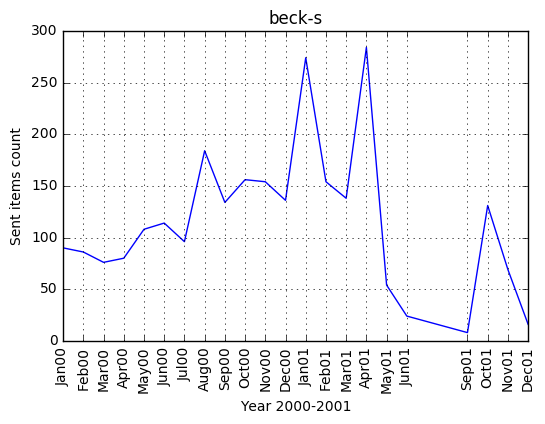

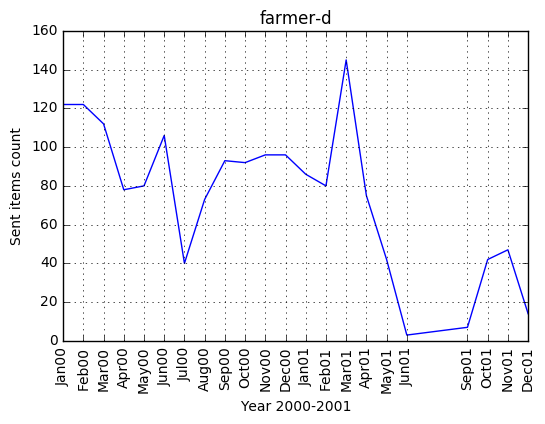

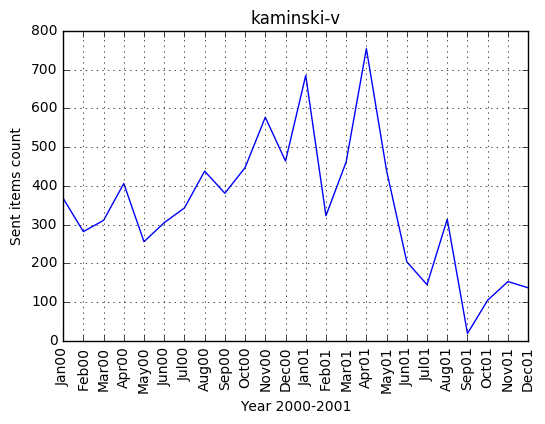

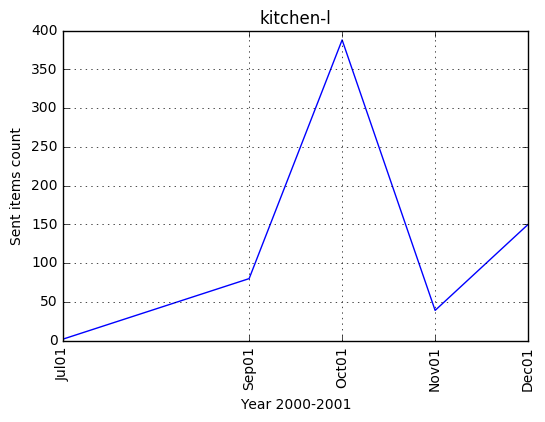

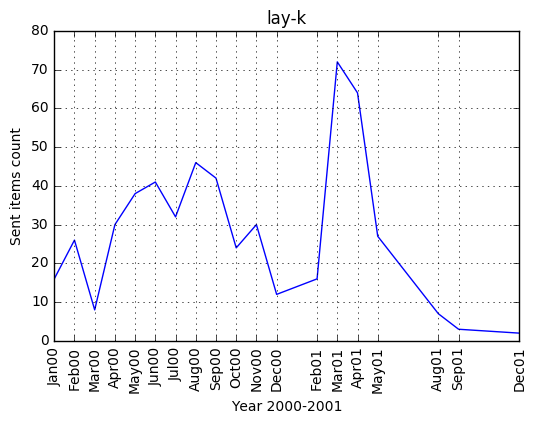

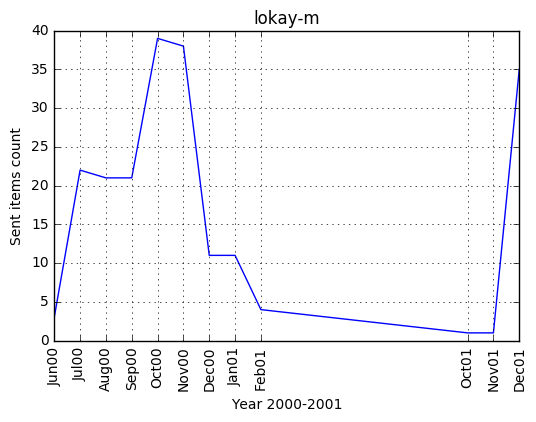

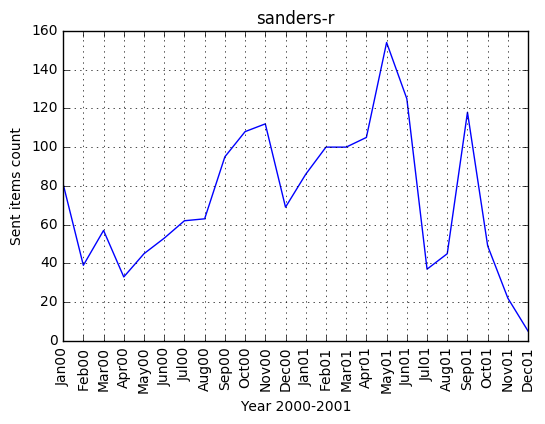

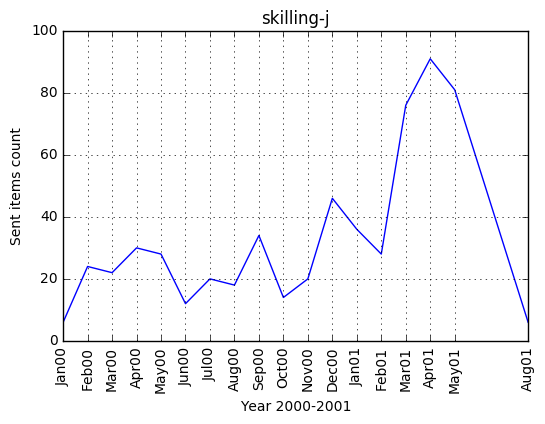

In [48]:
for name in name_list:
    count=[]
    duration=[]
    month_list=[]
    for i in range(1,13):
        if name in frequency00[i].keys():
            dur=calendar.month_name[i][:3]+'00'
            month_list.append(dur)
            duration.append(i)
            count.append(frequency00[i].get(name))
    for j in range(1,13):
        if name in frequency01[j].keys():
            dur1=calendar.month_name[j][:3]+'01'
            month_list.append(dur1)
            duration.append(j+12)
            count.append(frequency01[j].get(name))
    
    plt.xticks(duration,month_list,rotation=90)
    plot(duration,count)
    plt.xlabel('Year 2000-2001')
    plt.ylabel('Sent items count')
    plt.title(name)
    grid(True)
    #with open(os.path.join(path,name+'.png'),'w') as image:
    plt.gcf().savefig(os.path.join(path,name+'.png'))
#     plt.figure().savefig("analysis2.png")
    plt.show()
    
